In [22]:
import  grid2op
env = grid2op.make("l2rpn_case14_sandbox", test = True)
from grid2op.PlotGrid import PlotMatplot
import numpy as np

action_domains = {
    'agent_0' : [0,1,2,3, 4],
    'agent_1' : [5,6,7,8,9,10,11,12,13]
}

/home/najarfar/anaconda3/envs/grid2op/lib/python3.9/site-packages/grid2op/MakeEnv/Make.py:371: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


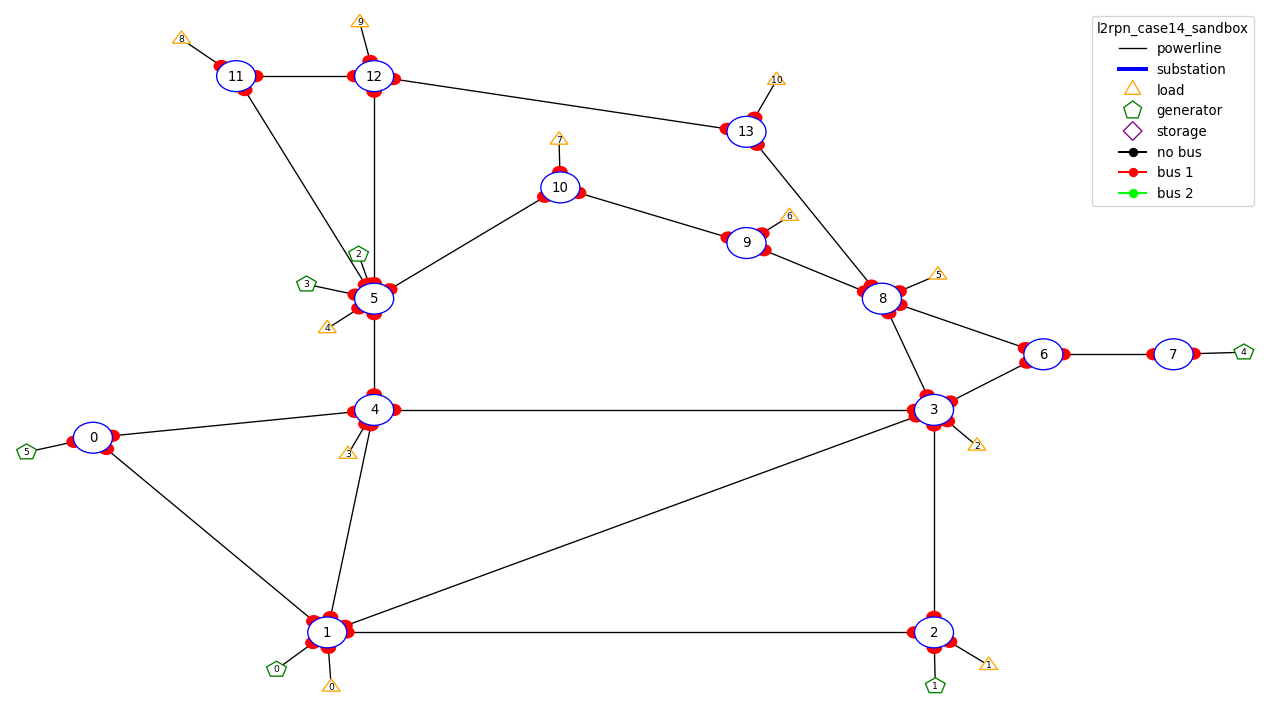

In [23]:
plot_helper = PlotMatplot(env.observation_space)
fig = plot_helper.plot_layout()

In [24]:
from grid2op.Space.GridObjects import GridObjects

subgrid = GridObjects()

In [25]:
subgrid.name_sub = env.name_sub[action_domains['agent_0']]
subgrid.n_sub = len(subgrid.name_sub)
subgrid.sub_info = env.sub_info[action_domains['agent_0']]

In [78]:
line_or_indices =  []
line_ex_indices =  []

for subid in action_domains['agent_0'] :
    
    
    indices = np.where(env.line_ex_to_subid == subid)[0]
    if len(indices):
        for indice in indices :
            line_ex_indices.append(indice)
    
    indices = list(np.where(env.line_or_to_subid == subid)[0])
    if len(indices):
        for indice in indices :
            line_or_indices.append(indice)




In [80]:
np.array(line_or_indices, dtype=int)
# np.array(line_ex_indices, dtype=int)
#line_or_indices.flatten()

array([ 0,  1,  2,  3,  4,  5,  6, 15, 16, 17])

In [90]:
print(env.name_load[np.array(load_indices, dtype=int)])
print(env.name_load[np.isin(env.load_to_subid, action_domains['agent_0'])])

['load_1_0' 'load_2_1' 'load_3_2' 'load_4_3']
['load_1_0' 'load_2_1' 'load_3_2' 'load_4_3']


In [79]:
env.line_or_to_subid

array([ 0,  0,  1,  1,  1,  2,  3,  5,  5,  5,  8,  8,  9, 11, 12,  3,  3,
        4,  6,  8], dtype=int32)

In [86]:
local2global_sub = dict(
    zip(
        list(range(len(action_domains['agent_1']))), action_domains['agent_1']
    )
)
local2global_sub

{0: 5, 1: 6, 2: 7, 3: 8, 4: 9, 5: 10, 6: 11, 7: 12, 8: 13}

In [97]:
env.name_line

array(['0_1_0', '0_4_1', '1_2_2', '1_3_3', '1_4_4', '2_3_5', '3_4_6',
       '5_10_7', '5_11_8', '5_12_9', '8_9_10', '8_13_11', '9_10_12',
       '11_12_13', '12_13_14', '3_6_15', '3_8_16', '4_5_17', '6_7_18',
       '6_8_19'], dtype='<U8')

In [96]:
np.where(np.array(mask) == True)

(array([0, 1, 2, 3]),)

In [105]:
mask = np.isin(env.line_or_to_subid, action_domains['agent_0'])
mask

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False])